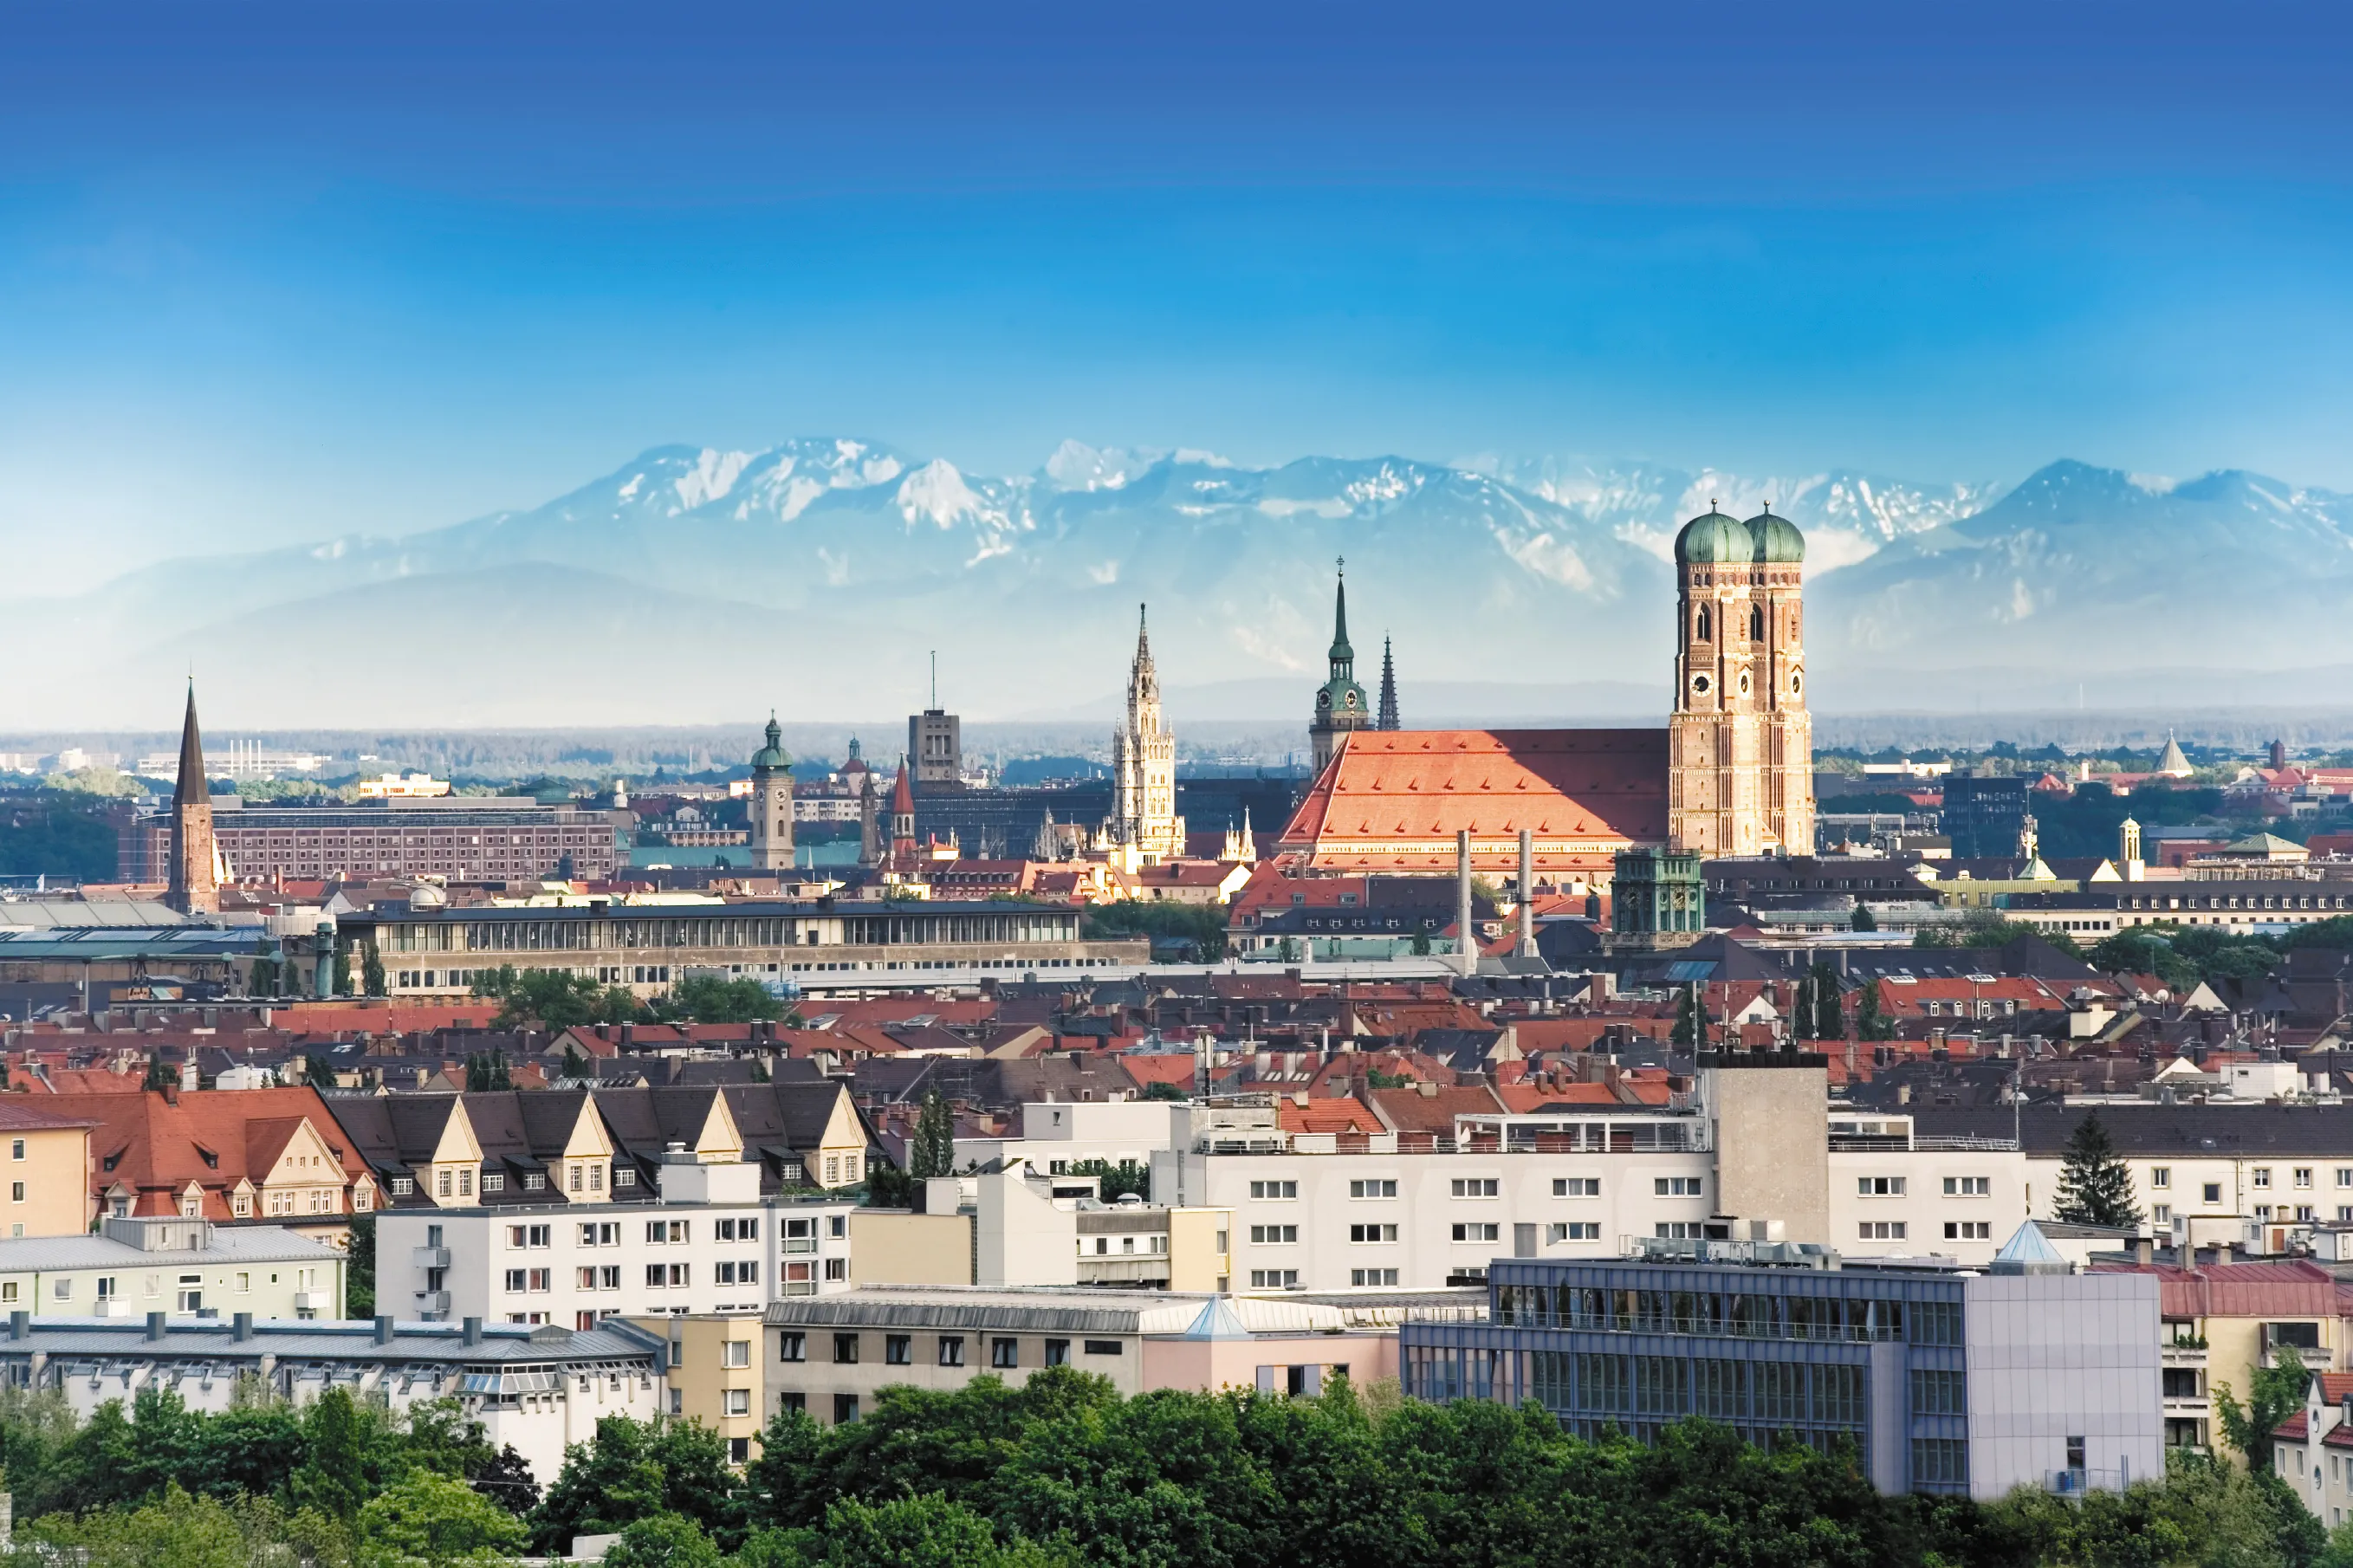

# **Monatszahlen Verkehrsunfälle**

Der Datensatz Monatszahlen Verkehrsunfälle beinhaltetdie Themen



*   Verkehrsunfälle
*   Fluchtunfälle


*   Alkoholunfälle







# DAS ZIEL DIESES PROJEKT:
Visualisieren Sie historisch die Anzahl der Unfälle pro Kategorie (Spalte 1). Der Datensatz enthält derzeit Werte bis Ende 2020. Erstellen Sie eine Anwendung, die die Werte prognostiziert für:



*   category: 'Alkoholunfälle'
*   Type: 'insgesamt

*   Jahr: '2021'
*   Monat: '01'








# **1-Import liberaries**

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
import dabl
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

# **2-Upload dataset**

In [2]:
df=pd.read_csv('https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2209_verkehrsunfaelle.csv')
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [3]:
df.tail()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0
2085,Verkehrsunfälle,Verletzte und Getötete,2000,200012,515.0,NaN,-10.90,NaN,588.0


In [4]:
df.shape

(2086, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONATSZAHL                     2086 non-null   object 
 1   AUSPRÄGUNG                     2086 non-null   object 
 2   JAHR                           2086 non-null   int64  
 3   MONAT                          2086 non-null   object 
 4   WERT                           2002 non-null   float64
 5   VORJAHRESWERT                  1995 non-null   float64
 6   VERÄND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERÄND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWÖLF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB


# **3-Data pre-processing**

In [6]:
# Process the data - considering first 5 columns
#Select only important columns
features = ['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT']
#Make the data only the important columns
df = df[features]

In [7]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [8]:
data = df.copy() #saved raw copy to use it later

In [9]:
df['MONATSZAHL'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [10]:
df['AUSPRÄGUNG'].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [11]:
df['JAHR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000])

In [12]:
df['MONAT'].unique()

array(['202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202212',
       'Summe', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '20150

**check for non-numeric values,replace Non-numeric value and empty values with NaN and drop rows with missing values in the numeric columns**


In [13]:
numeric_cols = ['JAHR', 'MONAT', 'WERT']
for col in numeric_cols:
    # replace Non-numeric value and empty values with NaN
    df.loc[:, col] = pd.to_numeric(df[col],downcast="integer", errors='coerce').astype('Int64')   #modifying the original DataFrame and not a copy of it.

df = df.dropna(subset=numeric_cols).reset_index(drop=True)

# check for missing values after dropping
print(df[numeric_cols].isnull().any())

JAHR     False
MONAT    False
WERT     False
dtype: bool


<ipython-input-13-5ade602f36ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = pd.to_numeric(df[col],downcast="integer", errors='coerce').astype('Int64')   #modifying the original DataFrame and not a copy of it.
<ipython-input-13-5ade602f36ca>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = pd.to_numeric(df[col],downcast="integer", errors='coerce').astype('Int64')   #modifying the original DataFrame and not a copy of it.


**change 'MONAT' TO date time format**

In [14]:
df['MONAT'] = pd.to_datetime(df['MONAT'], format='%Y%m').dt.month
df.head()


,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,1,16
1,Alkoholunfälle,insgesamt,2021,2,14
2,Alkoholunfälle,insgesamt,2021,3,24
3,Alkoholunfälle,insgesamt,2021,4,16
4,Alkoholunfälle,insgesamt,2021,5,24


**Remove the values in the 'JAHR' column is equal to "Summe".**

In [15]:
df.drop(df[df["JAHR"]=="Summe"].index,inplace=True)
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,1,16
1,Alkoholunfälle,insgesamt,2021,2,14
2,Alkoholunfälle,insgesamt,2021,3,24
3,Alkoholunfälle,insgesamt,2021,4,16
4,Alkoholunfälle,insgesamt,2021,5,24


**calculates the sum of missing values in each column.**

In [16]:
df.isnull().sum()

MONATSZAHL    0
AUSPRÄGUNG    0
JAHR          0
MONAT         0
WERT          0
dtype: int64

# **4-Data Exploration**

**Number of accidents every year**

In [17]:
(df.groupby([df.JAHR,df.MONATSZAHL]).MONATSZAHL.count()).unstack()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
JAHR,,,
2000,24,24,36
2001,24,24,36
2002,24,24,36
2003,24,24,36
2004,24,24,36
2005,24,24,36
2006,24,24,36
2007,24,24,36
2008,24,24,36


**represents the count of occurrences for each value in the 'MONATSZAHL', NOTE'Verkehrsunfälle'is high in all years**

Verkehrsunfälle    792
Alkoholunfälle     528
Fluchtunfälle      528
Name: MONATSZAHL, dtype: int64


<Axes: >

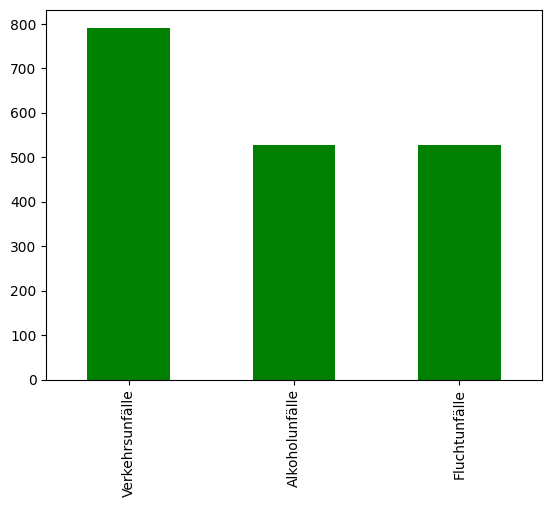

In [18]:
print(df['MONATSZAHL'].value_counts())
df['MONATSZAHL'].value_counts().plot(kind='bar',color='green')

**Number of accident per 'MONAT by MONATSZAHL**

In [19]:
(df.groupby([df.MONAT,df.MONATSZAHL]).MONATSZAHL.count()).unstack()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
MONAT,,,
1,44,44,66
2,44,44,66
3,44,44,66
4,44,44,66
5,44,44,66
6,44,44,66
7,44,44,66
8,44,44,66
9,44,44,66


**Here is the graph shows all the months are sharing equal number of accident**

1     154
2     154
3     154
4     154
5     154
6     154
7     154
8     154
9     154
10    154
11    154
12    154
Name: MONAT, dtype: int64


<Axes: >

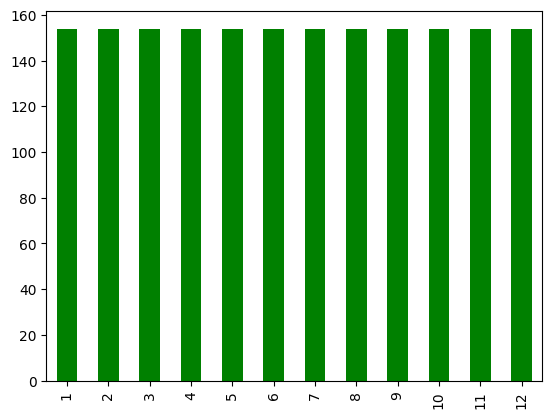

In [20]:
print(df['MONAT'].value_counts())
df['MONAT'].value_counts().plot(kind='bar',color='green')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='WERT', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=7.23E-02'}, xlabel='MONAT (jittered)', ylabel='WERT'>,
         <Axes: title={'center': 'F=-5.50E-02'}, xlabel='JAHR (jittered)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.75E-01'}, xlabel='WERT', ylabel='MONATSZAHL'>,
         <Axes: title={'center': 'F=4.91E-01'}, xlabel='WERT', ylabel='AUSPRÄGUNG'>]],
       dtype=object)]

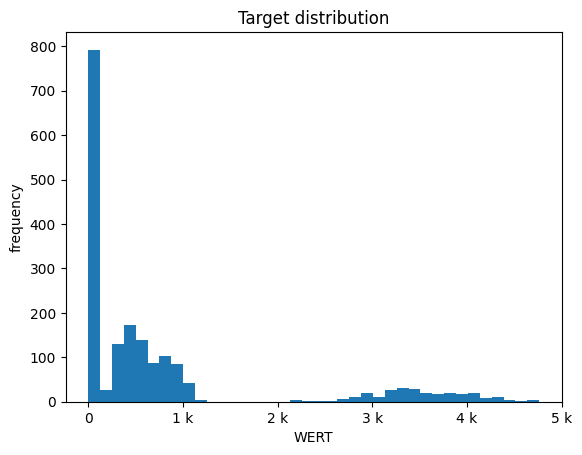

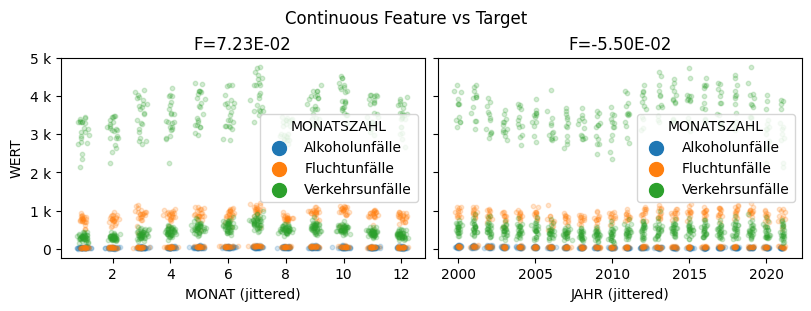

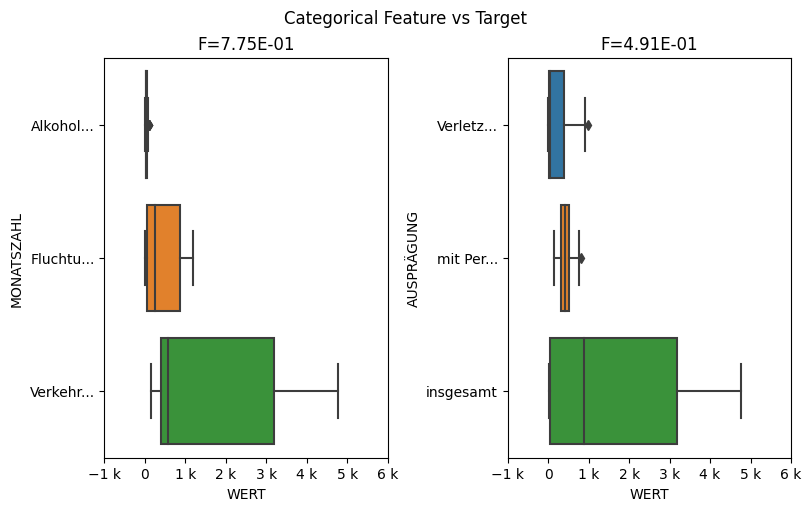

In [21]:
dabl.plot(df, target_col='WERT')

**from the bellow visualization wshows that the Verkehrsunfälle Accident category the maximun times happend**

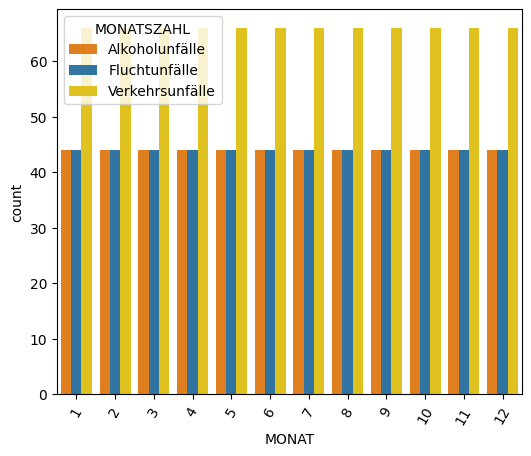

In [22]:
plt.figure(figsize=(6, 5))

# Define the desired color palette
colors = ["#FF7F00", "#1F77B4", "#FFD700"]

# Plot the countplot with the specified color palette
sns.countplot(x='MONAT', hue='MONATSZAHL', data=df, palette=colors)

plt.xlabel('MONAT')
plt.xticks(rotation=60)
plt.show()


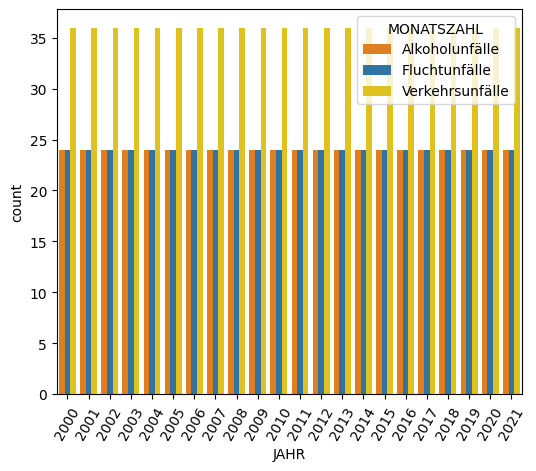

In [23]:
plt.figure(figsize=(6, 5))

# Define the desired color palette
colors = ["#FF7F00", "#1F77B4", "#FFD700"]

# Plot the countplot with the specified color palette
sns.countplot(x='JAHR', hue='MONATSZAHL', data=df, palette=colors)

plt.xlabel('JAHR')
plt.xticks(rotation=60)
plt.show()

<ipython-input-24-17236b5c9c90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.WERT,color='green')


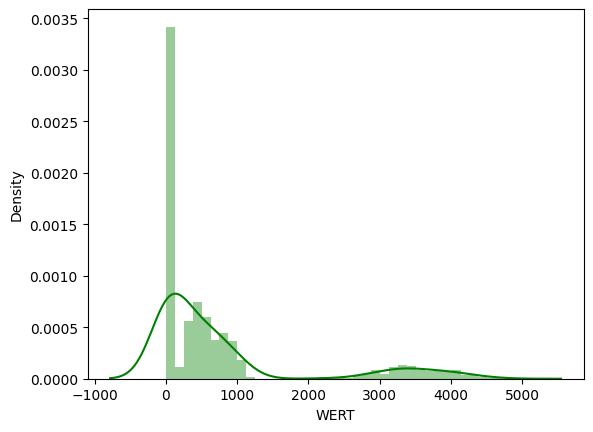

In [24]:
sns.distplot(df.WERT,color='green')
plt.show()

**From the belw graph the target column data is not normally disributed.**

<Axes: >

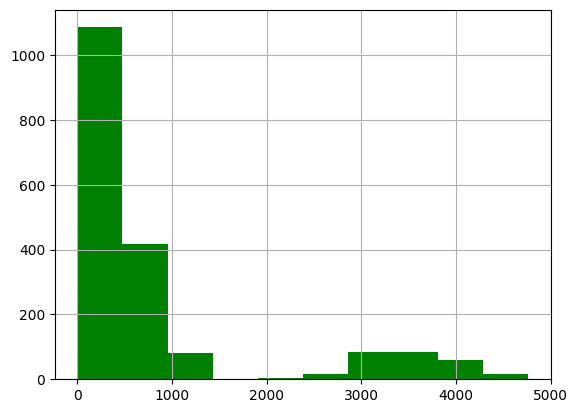

In [25]:
color='green'
df.WERT.hist(color=color)

**To visualize the co-orelation coefficient**

<ipython-input-26-f9016e448333>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'spearman')


<Axes: >

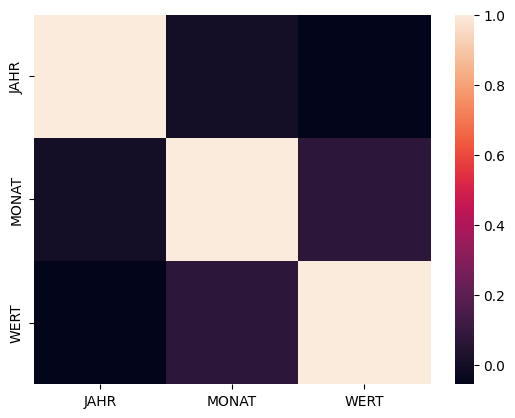

In [26]:
corr = df.corr(method = 'spearman')
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

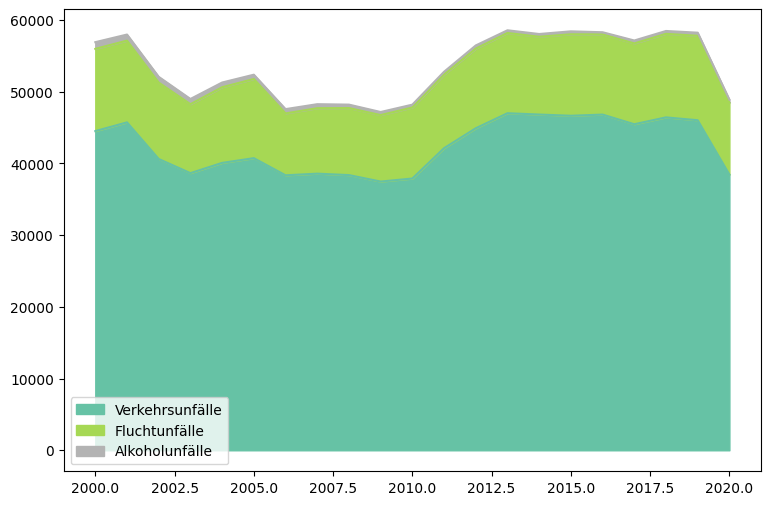

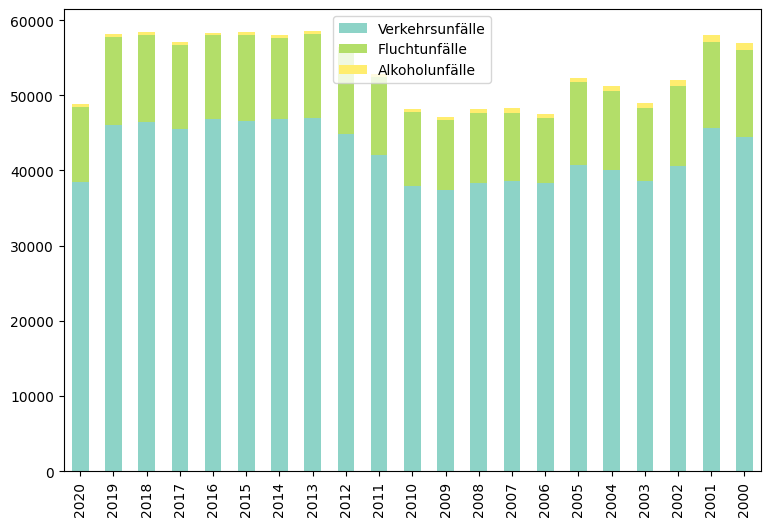

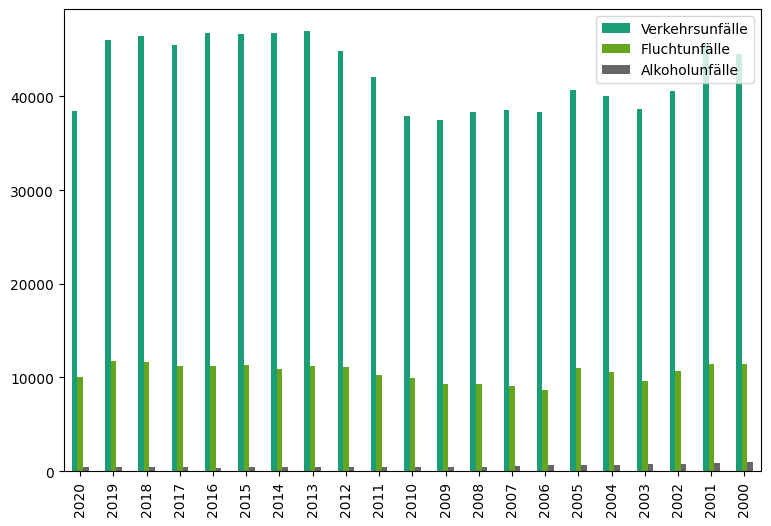

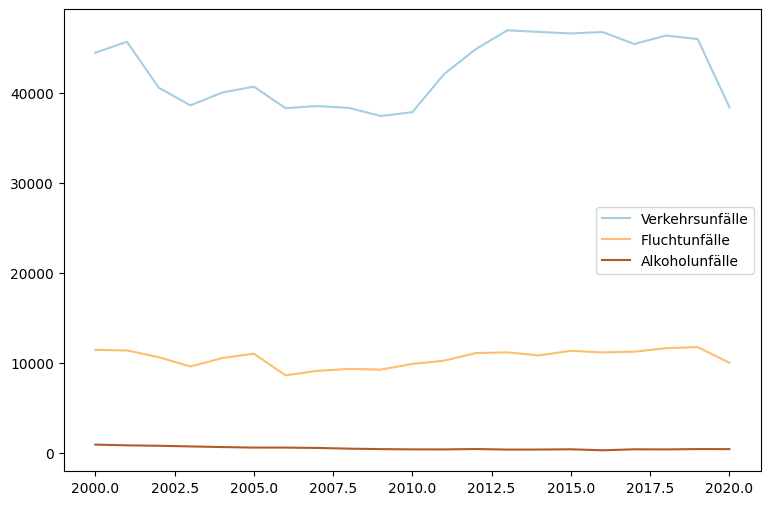

In [27]:
df_2020 = data[data['JAHR'] < 2021]

Verkehrsunfälle = df_2020[( (df_2020['MONATSZAHL'] == 'Verkehrsunfälle') & (df_2020['MONAT'] == 'Summe') & (df_2020['AUSPRÄGUNG'] == 'insgesamt') )]
Fluchtunfälle = df_2020[((df_2020['MONATSZAHL'] == 'Fluchtunfälle') & (df_2020['MONAT'] == 'Summe') &(df_2020['AUSPRÄGUNG'] == 'insgesamt') )]
Alkoholunfälle = df_2020[( (df_2020['MONATSZAHL'] == 'Alkoholunfälle') &(df_2020['MONAT'] == 'Summe') &(df_2020['AUSPRÄGUNG'] == 'insgesamt') )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_WERT = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['WERT'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['WERT'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['WERT'].to_numpy()  },
    index= years )

accidents_WERT.plot(kind='area', colormap='Set2')
plt.gcf().set_size_inches(9, 6)

accidents_WERT.plot(kind='bar', stacked=True, colormap='Set3')
plt.gcf().set_size_inches(9, 6)

accidents_WERT.plot(kind='bar', colormap='Dark2')
plt.gcf().set_size_inches(9, 6)

accidents_WERT.plot(colormap='Paired')
plt.gcf().set_size_inches(9, 6)


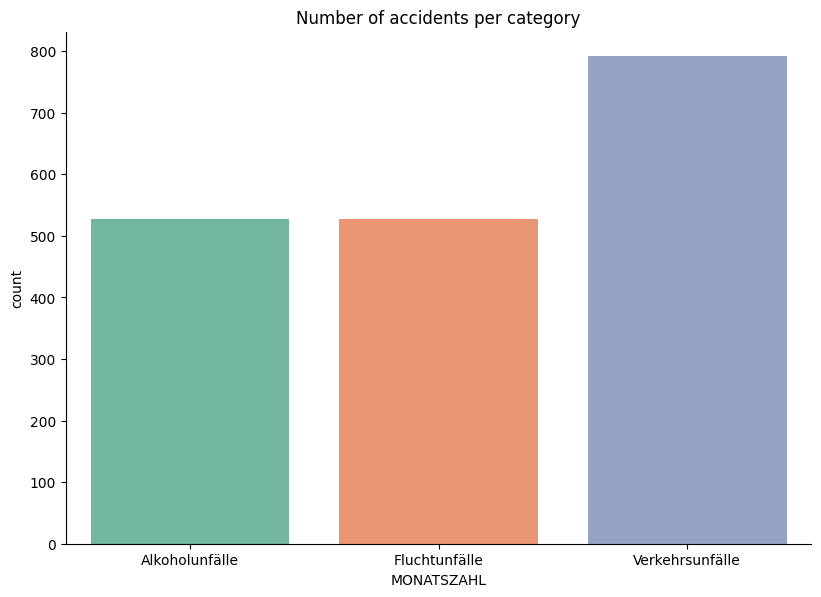

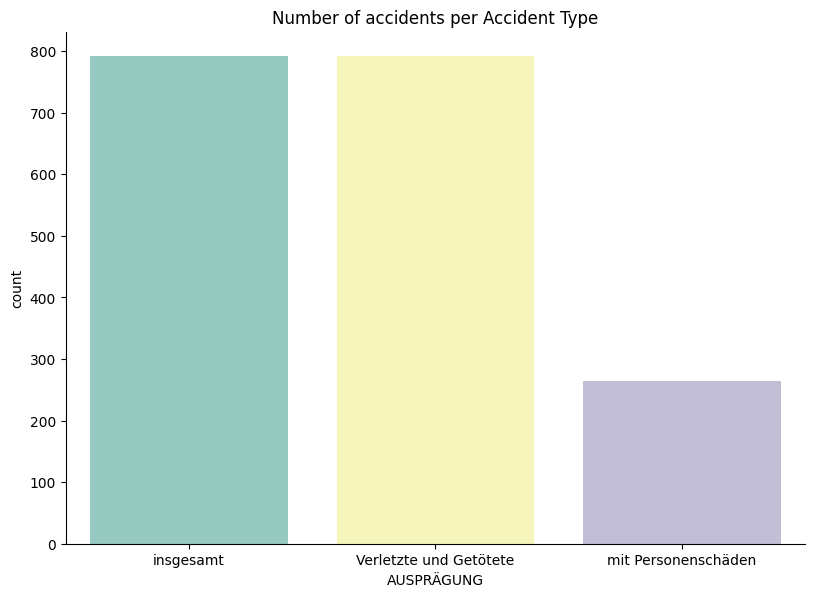

In [28]:
# Plot Number of accidents per category
plot = sns.catplot(x="MONATSZAHL", kind="count", data=df, palette="Set2")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="AUSPRÄGUNG", kind="count", data=df, palette="Set3")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)

# **5-TIME SERIES**

**Change the names of the columnes and drop the columnes after 2020**

In [29]:
df = df.rename( columns = {
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'y',
    'MONATSZAHL': 'Category',
    'AUSPRÄGUNG': 'Accident-type'
})
df = df[df['Year'] <= 2020]
df

,Category,Accident-type,Year,Month,y
12,Alkoholunfälle,insgesamt,2020,1,28
13,Alkoholunfälle,insgesamt,2020,2,40
14,Alkoholunfälle,insgesamt,2020,3,27
15,Alkoholunfälle,insgesamt,2020,4,26
16,Alkoholunfälle,insgesamt,2020,5,40
...,...,...,...,...,...
1843,Verkehrsunfälle,Verletzte und Getötete,2000,8,647
1844,Verkehrsunfälle,Verletzte und Getötete,2000,9,675
1845,Verkehrsunfälle,Verletzte und Getötete,2000,10,615
1846,Verkehrsunfälle,Verletzte und Getötete,2000,11,578


In [30]:
print(df['Year'])

12      2020
13      2020
14      2020
15      2020
16      2020
        ... 
1843    2000
1844    2000
1845    2000
1846    2000
1847    2000
Name: Year, Length: 1764, dtype: Int64


**create a day column**

In [34]:
df['Day'] = 1


**create a new column 'ds' in the DataFrame 'df' by combining the 'Day', 'Month', and 'Year' columns**

In [35]:
df['ds'] = pd.to_datetime(df[['Day', 'Month', 'Year']])
df.head()


,Category,Accident-type,Year,Month,y,Day,ds
12,Alkoholunfälle,insgesamt,2020,1,28,1,2020-01-01
13,Alkoholunfälle,insgesamt,2020,2,40,1,2020-02-01
14,Alkoholunfälle,insgesamt,2020,3,27,1,2020-03-01
15,Alkoholunfälle,insgesamt,2020,4,26,1,2020-04-01
16,Alkoholunfälle,insgesamt,2020,5,40,1,2020-05-01


**set accident type to 'insgesamt' only**

In [36]:
df = df.loc[(df['Accident-type'] == 'insgesamt')]
df

,Category,Accident-type,Year,Month,y,Day,ds
12,Alkoholunfälle,insgesamt,2020,1,28,1,2020-01-01
13,Alkoholunfälle,insgesamt,2020,2,40,1,2020-02-01
14,Alkoholunfälle,insgesamt,2020,3,27,1,2020-03-01
15,Alkoholunfälle,insgesamt,2020,4,26,1,2020-04-01
16,Alkoholunfälle,insgesamt,2020,5,40,1,2020-05-01
...,...,...,...,...,...,...,...
1315,Verkehrsunfälle,insgesamt,2000,8,3387,1,2000-08-01
1316,Verkehrsunfälle,insgesamt,2000,9,3807,1,2000-09-01
1317,Verkehrsunfälle,insgesamt,2000,10,4117,1,2000-10-01
1318,Verkehrsunfälle,insgesamt,2000,11,3931,1,2000-11-01


**separate the categories into various dataframes dependeing on their types to use Alkoholunfälle later**

In [37]:
df_alk = df.loc[(df['Category'] == 'Alkoholunfälle')]

df_flucht = df.loc[(df['Category'] == 'Fluchtunfälle')]

df_verkehr = df.loc[(df['Category'] == 'Verkehrsunfälle')]

In [38]:
df_alk

,Category,Accident-type,Year,Month,y,Day,ds
12,Alkoholunfälle,insgesamt,2020,1,28,1,2020-01-01
13,Alkoholunfälle,insgesamt,2020,2,40,1,2020-02-01
14,Alkoholunfälle,insgesamt,2020,3,27,1,2020-03-01
15,Alkoholunfälle,insgesamt,2020,4,26,1,2020-04-01
16,Alkoholunfälle,insgesamt,2020,5,40,1,2020-05-01
...,...,...,...,...,...,...,...
259,Alkoholunfälle,insgesamt,2000,8,77,1,2000-08-01
260,Alkoholunfälle,insgesamt,2000,9,84,1,2000-09-01
261,Alkoholunfälle,insgesamt,2000,10,83,1,2000-10-01
262,Alkoholunfälle,insgesamt,2000,11,71,1,2000-11-01


In [39]:
df_flucht

,Category,Accident-type,Year,Month,y,Day,ds
540,Fluchtunfälle,insgesamt,2020,1,791,1,2020-01-01
541,Fluchtunfälle,insgesamt,2020,2,870,1,2020-02-01
542,Fluchtunfälle,insgesamt,2020,3,744,1,2020-03-01
543,Fluchtunfälle,insgesamt,2020,4,607,1,2020-04-01
544,Fluchtunfälle,insgesamt,2020,5,859,1,2020-05-01
...,...,...,...,...,...,...,...
787,Fluchtunfälle,insgesamt,2000,8,881,1,2000-08-01
788,Fluchtunfälle,insgesamt,2000,9,978,1,2000-09-01
789,Fluchtunfälle,insgesamt,2000,10,1078,1,2000-10-01
790,Fluchtunfälle,insgesamt,2000,11,1017,1,2000-11-01


In [40]:
df_verkehr

,Category,Accident-type,Year,Month,y,Day,ds
1068,Verkehrsunfälle,insgesamt,2020,1,3139,1,2020-01-01
1069,Verkehrsunfälle,insgesamt,2020,2,3271,1,2020-02-01
1070,Verkehrsunfälle,insgesamt,2020,3,2825,1,2020-03-01
1071,Verkehrsunfälle,insgesamt,2020,4,2251,1,2020-04-01
1072,Verkehrsunfälle,insgesamt,2020,5,3193,1,2020-05-01
...,...,...,...,...,...,...,...
1315,Verkehrsunfälle,insgesamt,2000,8,3387,1,2000-08-01
1316,Verkehrsunfälle,insgesamt,2000,9,3807,1,2000-09-01
1317,Verkehrsunfälle,insgesamt,2000,10,4117,1,2000-10-01
1318,Verkehrsunfälle,insgesamt,2000,11,3931,1,2000-11-01


In [41]:
len(df)

756

In [56]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

**Make predictions **

**Apply time series on alchol dataframe and Fitting monthly data and making monthly forecasts for the next 12 months**

In [44]:
from datetime import datetime
import pandas as pd

m = Prophet()
m.fit(df_alk)

# Specify the end date for the prediction (January 2021)
end_date = datetime(year=2021, month=1, day=31)

# Calculate the number of periods from the last available date to the end date
last_date = df_alk['ds'].max()
num_periods = (end_date - last_date).days

# Create a future dataframe with the specified number of periods
future = m.make_future_dataframe(periods=num_periods)

# Generate the forecast up to the end date
forecast = m.predict(future)

# Filter the forecast to include only the period up to the end date
forecast = forecast[forecast['ds'] <= end_date]




INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt1nb31f/5h9cpymc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt1nb31f/s8qgrd4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26484', 'data', 'file=/tmp/tmpzt1nb31f/5h9cpymc.json', 'init=/tmp/tmpzt1nb31f/s8qgrd4r.json', 'output', 'file=/tmp/tmpzt1nb31f/prophet_model0_95zn5c/prophet_model-20230624151408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
future

,ds
0,2000-01-01
1,2000-02-01
2,2000-03-01
3,2000-04-01
4,2000-05-01
...,...
308,2021-01-27
309,2021-01-28
310,2021-01-29
311,2021-01-30


In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,76.097544,55.530993,75.334654,76.097544,76.097544,-10.976443,-10.976443,-10.976443,-10.976443,-10.976443,-10.976443,0.0,0.0,0.0,65.121101
1,2000-02-01,75.739631,52.765277,71.779108,75.739631,75.739631,-13.130641,-13.130641,-13.130641,-13.130641,-13.130641,-13.130641,0.0,0.0,0.0,62.608991
2,2000-03-01,75.404810,57.090489,77.180820,75.404810,75.404810,-8.079099,-8.079099,-8.079099,-8.079099,-8.079099,-8.079099,0.0,0.0,0.0,67.325711
3,2000-04-01,75.046897,59.591488,79.996027,75.046897,75.046897,-4.961968,-4.961968,-4.961968,-4.961968,-4.961968,-4.961968,0.0,0.0,0.0,70.084930
4,2000-05-01,74.700531,71.458615,91.156252,74.700531,74.700531,6.675698,6.675698,6.675698,6.675698,6.675698,6.675698,0.0,0.0,0.0,81.376228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2021-01-27,33.258117,3.348166,21.851963,33.258117,33.258117,-20.702684,-20.702684,-20.702684,-20.702684,-20.702684,-20.702684,0.0,0.0,0.0,12.555433
309,2021-01-28,33.258407,4.932528,23.798511,33.258407,33.258407,-19.089095,-19.089095,-19.089095,-19.089095,-19.089095,-19.089095,0.0,0.0,0.0,14.169312
310,2021-01-29,33.258697,5.523373,25.668780,33.258697,33.258697,-17.347377,-17.347377,-17.347377,-17.347377,-17.347377,-17.347377,0.0,0.0,0.0,15.911320
311,2021-01-30,33.258987,7.817529,27.334327,33.258987,33.258987,-15.509743,-15.509743,-15.509743,-15.509743,-15.509743,-15.509743,0.0,0.0,0.0,17.749244


In [47]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
289,2021-01-08,17.074277,7.377611,26.766167
290,2021-01-09,15.930714,6.472548,26.142171
291,2021-01-10,14.741579,5.307763,24.710189
292,2021-01-11,13.534780,3.775850,23.365828
293,2021-01-12,12.340025,2.096541,22.176151
294,2021-01-13,11.188052,1.259939,20.787843
295,2021-01-14,10.109808,0.720949,19.069125
296,2021-01-15,9.135614,-0.755083,19.388216
297,2021-01-16,8.294329,-1.015070,18.386784
298,2021-01-17,7.612548,-1.533393,16.785127


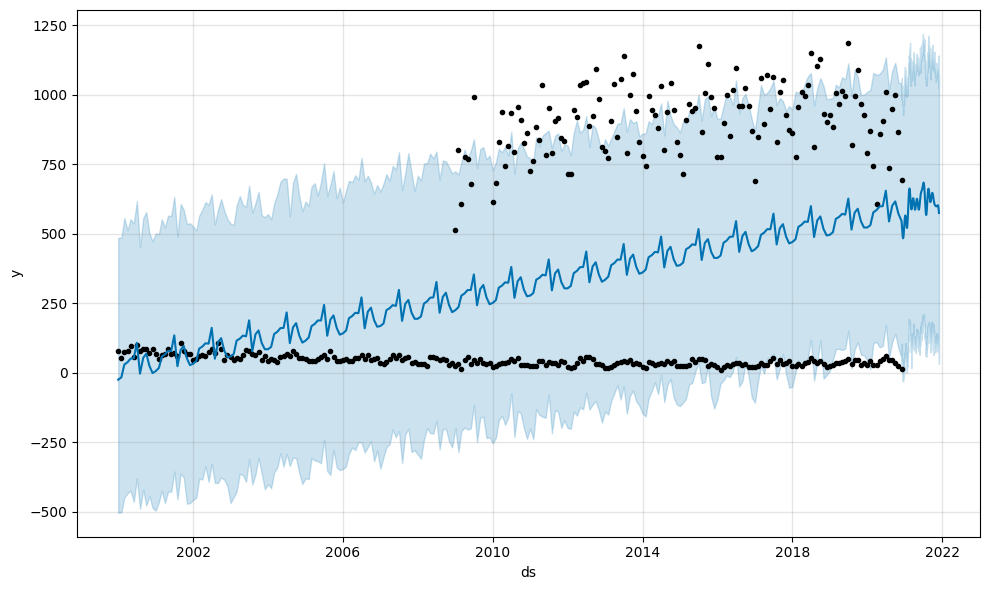

In [57]:
fig1 = m.plot(forecast)

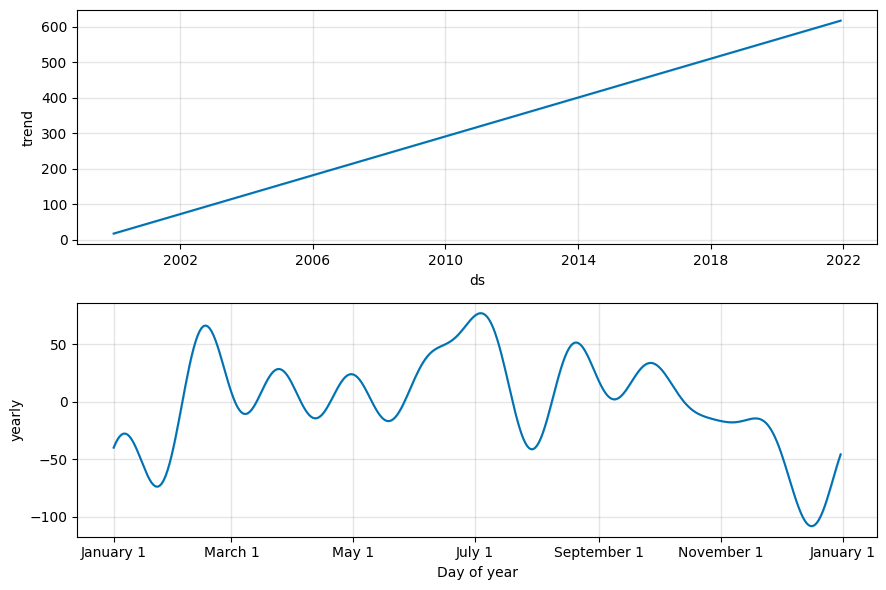

In [58]:
fig2 = m.plot_components(forecast)

# **6-Module Evaluation**

In [55]:
predictions = forecast.iloc[-365:]['yhat'].values
actual_values = test['y'].values
rmse_value = np.sqrt(mean_squared_error(actual_values, predictions))
mean_value = np.mean(actual_values)
print("Root Mean Squared Error between actual and predicted values:", rmse_value)
print("Mean Value of Test Dataset:", mean_value)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt1nb31f/ae8wcynb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzt1nb31f/j5ybd0vg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8809', 'data', 'file=/tmp/tmpzt1nb31f/ae8wcynb.json', 'init=/tmp/tmpzt1nb31f/j5ybd0vg.json', 'output', 'file=/tmp/tmpzt1nb31f/prophet_modeli2t5vqv4/prophet_model-20230624152046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error between actual and predicted values: 2462.5011031433037
Mean Value of Test Dataset: 2704.9780821917807


# **THANK YOU**